In [192]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
np.random.seed(1)

def compute_loss(x, y, beta):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    pr = sigmoid(X.dot(beta))
    return -np.mean(y * np.log(pr + 1e-8) + (1 - y) * np.log(1 - pr + 1e-8))

def logistic(x, y, num_iteration=1000, learning_rate=1e-5):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r,1)), x))
    beta = 2*np.random.randn(p, 1)-1
    for i in range(num_iteration):
        pr = sigmoid(X.dot(beta))
        beta = beta + learning_rate* X.T.dot(y-pr)
    return beta
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def predict(x, beta, threshold=0.5):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    probabilities = sigmoid(X.dot(beta))
    return (probabilities >= threshold).astype(int)



In [193]:
def logistic_with_nag(x, y, num_iteration=1000, learning_rate=1e-5, momentum=0.8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1
    v = np.zeros_like(beta)
    for i in range(num_iteration):
        lbeta = beta + momentum * v
        pr = sigmoid(X.dot(lbeta))
        gradient = X.T.dot(y - pr)
        v = momentum * v + learning_rate * gradient
        beta = beta + v
    return beta

dataset from https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

In [194]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("Data.csv")
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [195]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [196]:
data=pd.get_dummies(data, columns=["Gender","Customer Type","Type of Travel","Class",'satisfaction'], drop_first=True)
data.replace({True:1,False:0},inplace=True)
data = data.drop(columns=["id","Unnamed: 0"])
data=data.dropna()
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


In [197]:
X = data.iloc[:, :-1].to_numpy() 
y = data.iloc[:, -1].to_numpy().reshape(-1, 1) 

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,train_size=0.8,random_state=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

In [199]:
from sklearn.metrics import f1_score
logistic_beta = logistic(X_train_scaled, Ytrain)
Ypred = predict(X_test_scaled, logistic_beta)
accuracy = np.mean(Ypred == Ytest)
print(f"Accuracy on test data: {accuracy}")
print(f1_score(y_true=Ytest,y_pred=Ypred))

Accuracy on test data: 0.8740769342149718
0.8511779134105298


In [200]:
logistic_beta_nag = logistic_with_nag(X_train_scaled, Ytrain)
Ypred_nag = predict(X_test_scaled, logistic_beta_nag)
accuracy_nag = np.mean(Ypred_nag == Ytest)
print(f"Accuracy on test data: {accuracy_nag}")
print(f1_score(y_true=Ytest,y_pred=Ypred_nag))

Accuracy on test data: 0.8737873449490805
0.8508186433909521


In [201]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,Ytrain.ravel())
pred=model.predict(X_test_scaled)
print(np.mean(pred==Ytest.ravel()))
print(f1_score(y_true=Ytest.ravel(),y_pred=pred))

0.8737873449490805
0.8508186433909521


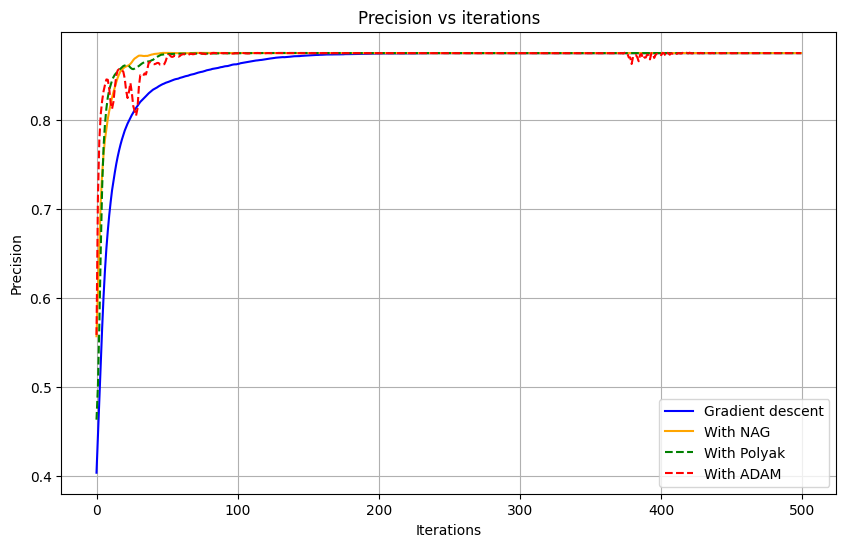

In [220]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Modèle sans NAG
def logistic(x, y, num_iteration=1000, learning_rate=1e-3):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1
    accuracies = []  # Liste pour stocker la précision à chaque itération
    for i in range(num_iteration):
        pr = sigmoid(X.dot(beta))  # Prédictions en probabilité
        y_pred = (pr >= 0.5).astype(int)  # Convertir les probabilités en classes
        accuracy = accuracy_score(y, y_pred)  # Calcul de la précision
        accuracies.append(accuracy)
        beta = beta + learning_rate * X.T.dot(y - pr)
    return beta, accuracies

# Modèle avec NAG
def logistic_with_nag(x, y, num_iteration=1000, learning_rate=1e-4, momentum=0.8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1
    v = np.zeros_like(beta)
    accuracies = []  # Liste pour stocker la précision à chaque itération
    for i in range(num_iteration):
        lbeta = beta + momentum * v
        pr = sigmoid(X.dot(lbeta))  # Prédictions en probabilité
        y_pred = (pr >= 0.5).astype(int)  # Convertir les probabilités en classes
        accuracy = accuracy_score(y, y_pred)  # Calcul de la précision
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)
        v = momentum * v + learning_rate * gradient
        beta = beta + v
    return beta, accuracies

def logistic_polyak(X, y, num_iteration=10000, learning_rate=1e-5, momentum=0.9):
    r, c = X.shape
    X = np.hstack((np.ones((r, 1)), X))
    beta = 2 * np.random.randn(c + 1, 1) - 1
    velocity = np.zeros_like(beta)
    accuracies = []
    for i in range(num_iterations):
        predictions = sigmoid(X.dot(beta))
        y_pred = (predictions >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - predictions)
        velocity = momentum * velocity + learning_rate * gradient
        beta += velocity
    return beta,accuracies

def logisticAdam(x, y, num_iteration=1000, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r,1)), x))
    beta = 2*np.random.randn(p, 1)-1
    # Adam optimization variables
    m = np.zeros((p, 1))
    v = np.zeros((p, 1))
    t = 0
    accuracies = []
    for i in range(num_iteration):
        t += 1
        pr = sigmoid(X.dot(beta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        beta += learning_rate * m_hat/(np.sqrt(v_hat) + epsilon)
    return beta,accuracies

# Entraînement des deux modèles avec votre jeu de données
num_iterations = 300
learning_rate = 1e-5
momentum = 0.8

# Sans NAG
beta_gd, accuracies_gd = logistic(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=learning_rate)

# Avec NAG
beta_with_nag, accuracies_with_nag = logistic_with_nag(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=learning_rate, momentum=momentum)

# Polyak
beta_with_pol, accuracies_with_pol = logistic_polyak(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=learning_rate, momentum=momentum)

#ADAM
beta_with_adam, accuracies_with_adam = logisticAdam(X_train_scaled, Ytrain, num_iteration=num_iterations,learning_rate=1)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), accuracies_gd, label='Gradient descent', linestyle='-', color='blue')
plt.plot(range(num_iterations), accuracies_with_nag, label='With NAG', linestyle='-', color='orange')
plt.plot(range(num_iterations), accuracies_with_pol, label='With Polyak', linestyle='--', color='green')
plt.plot(range(num_iterations), accuracies_with_adam, label='With ADAM', linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Precision vs iterations')
plt.legend()
plt.grid(True)
plt.show()